In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('data/credir_risk_reto.csv',delimiter = ';')

In [54]:
df.head()

,Age,Sex,Job,Housing,Savings account,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Savings account   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


Se observan valores faltantes en 'Saving accounts' y 'Checking account'


In [56]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


Los valores máximos y mínimos de 'Age', 'Credit amount' y 'Duration' no son absurdas, tienen sentido respecto a la definición de las columnas indicada en Github.

In [57]:
columnas_categoricas = df.select_dtypes(include=['object']).columns

In [58]:
df[columnas_categoricas].describe()

,Sex,Housing,Savings account,Checking account,Purpose
count,1000,1000,817,606,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,603,274,337


In [59]:
for col in columnas_categoricas:
    print(df[col].unique())

['male' 'female']
['own' 'free' 'rent']
[nan 'little' 'quite rich' 'rich' 'moderate']
['little' 'moderate' nan 'rich']
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


In [60]:
df['Job'].unique()

array([2, 1, 3, 0])

Las categorías de cada columna son consistentes, la cantidad de categorías de Job coincide con el Github

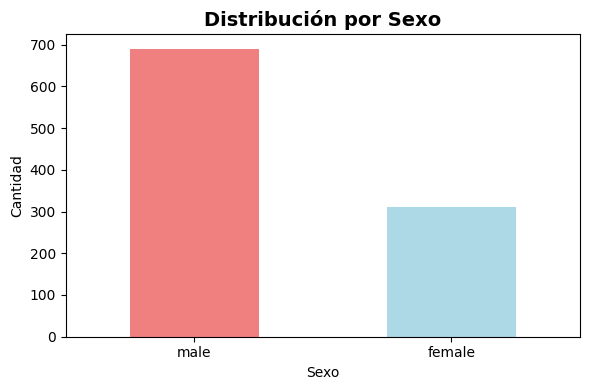

In [61]:
sex_counts = df['Sex'].value_counts()        
fig, ax1 = plt.subplots(figsize=(6,4))
sex_counts.plot(kind='bar', ax=ax1, color=['lightcoral', 'lightblue'])
ax1.set_title('Distribución por Sexo', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sexo')
ax1.set_ylabel('Cantidad')
ax1.tick_params(axis='x', rotation=0)
        
plt.tight_layout()
plt.show()

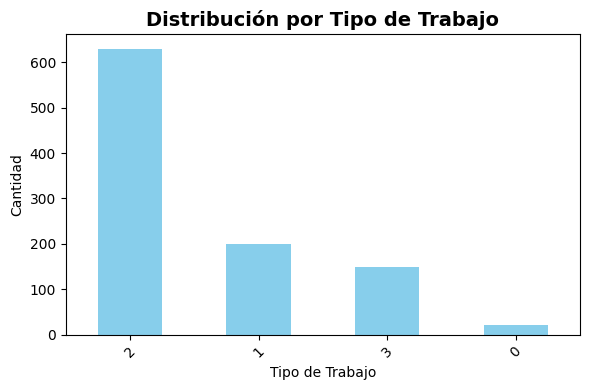

In [62]:
job_counts = df['Job'].value_counts()
fig, ax1 = plt.subplots(figsize=(6, 4))
job_counts.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Distribución por Tipo de Trabajo', fontsize=14, fontweight='bold')
ax1.set_xlabel('Tipo de Trabajo')
ax1.set_ylabel('Cantidad')
ax1.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()
        

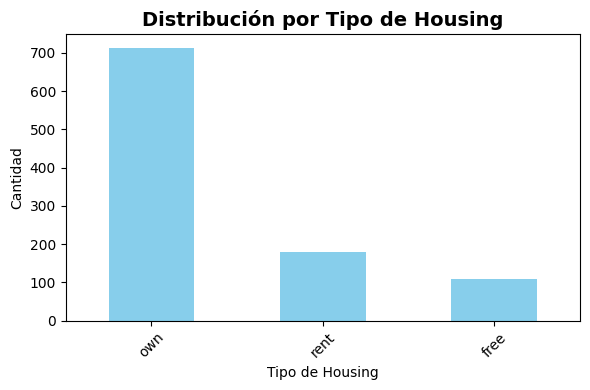

In [63]:
job_counts = df['Housing'].value_counts()
fig, ax1 = plt.subplots(figsize=(6, 4))
job_counts.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Distribución por Tipo de Housing', fontsize=14, fontweight='bold')
ax1.set_xlabel('Tipo de Housing')
ax1.set_ylabel('Cantidad')
ax1.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

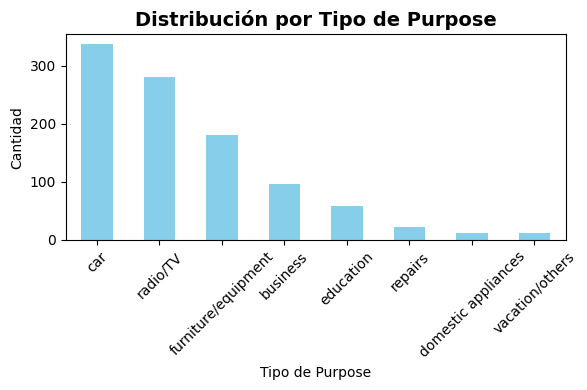

In [64]:
job_counts = df['Purpose'].value_counts()
fig, ax1 = plt.subplots(figsize=(6, 4))
job_counts.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Distribución por Tipo de Purpose', fontsize=14, fontweight='bold')
ax1.set_xlabel('Tipo de Purpose')
ax1.set_ylabel('Cantidad')
ax1.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

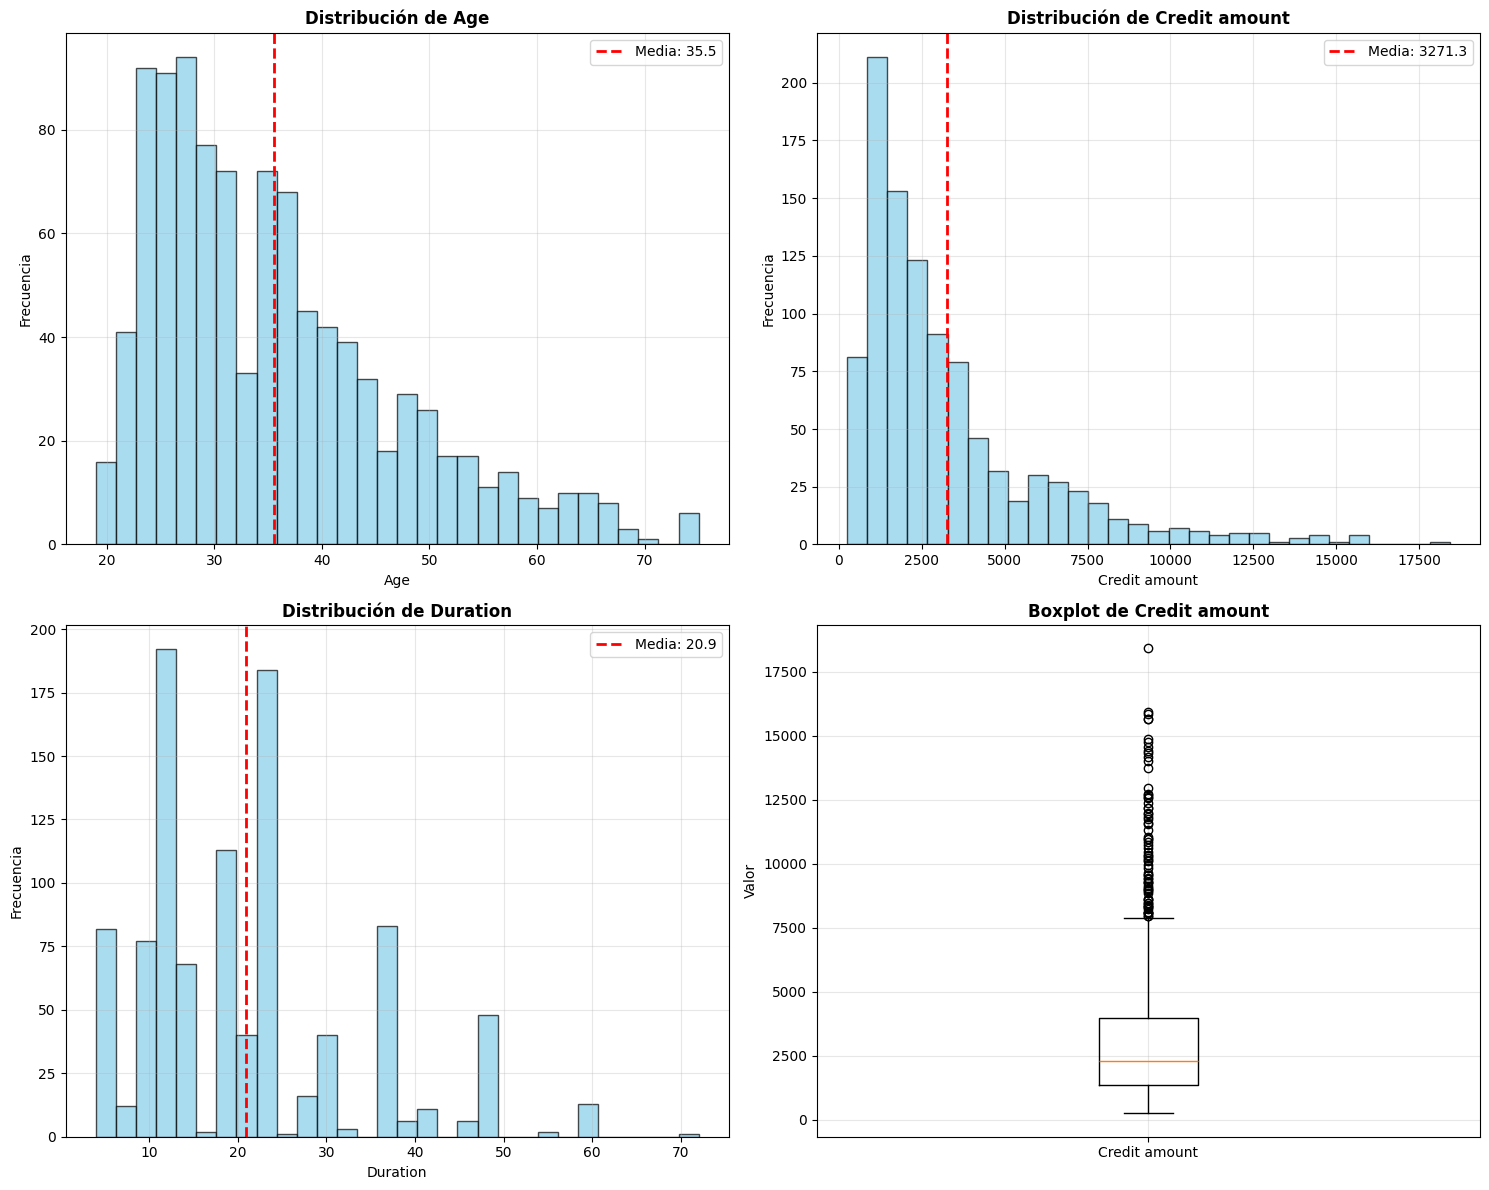

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()
numeric_cols = ['Age', 'Credit amount', 'Duration']
for i, col in enumerate(numeric_cols):
            # Histograma
            axes[i].hist(df[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
            axes[i].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frecuencia')
            axes[i].grid(True, alpha=0.3)
            
            # Añadir línea de media
            mean_val = df[col].mean()
            axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.1f}')
            axes[i].legend()
        
# Box plots
axes[3].boxplot(df['Credit amount'].dropna())
axes[3].set_title('Boxplot de Credit amount', fontsize=12, fontweight='bold')
axes[3].set_ylabel('Valor')
axes[3].set_xticks([1])
axes[3].set_xticklabels(['Credit amount'])
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

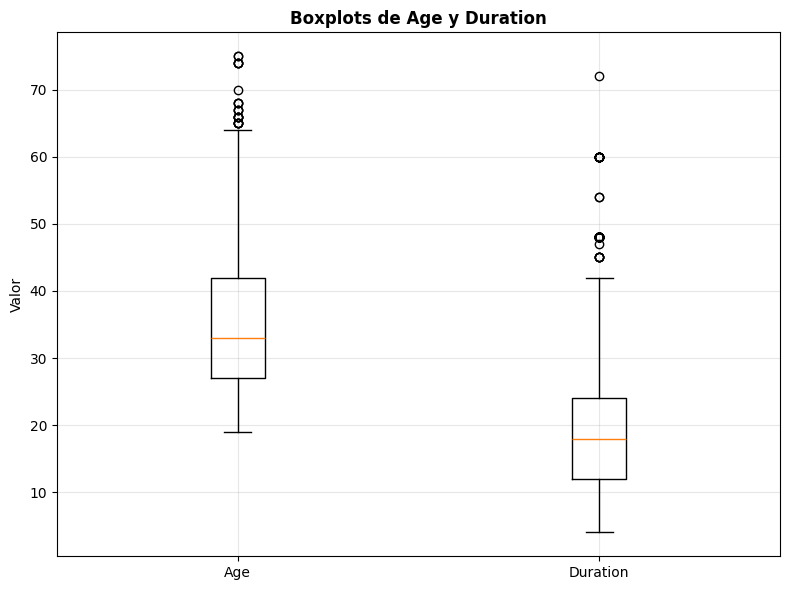

In [66]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot([df['Age'].dropna(), df['Duration'].dropna()], tick_labels=['Age', 'Duration'])
ax.set_title('Boxplots de Age y Duration', fontsize=12, fontweight='bold')
ax.set_ylabel('Valor')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


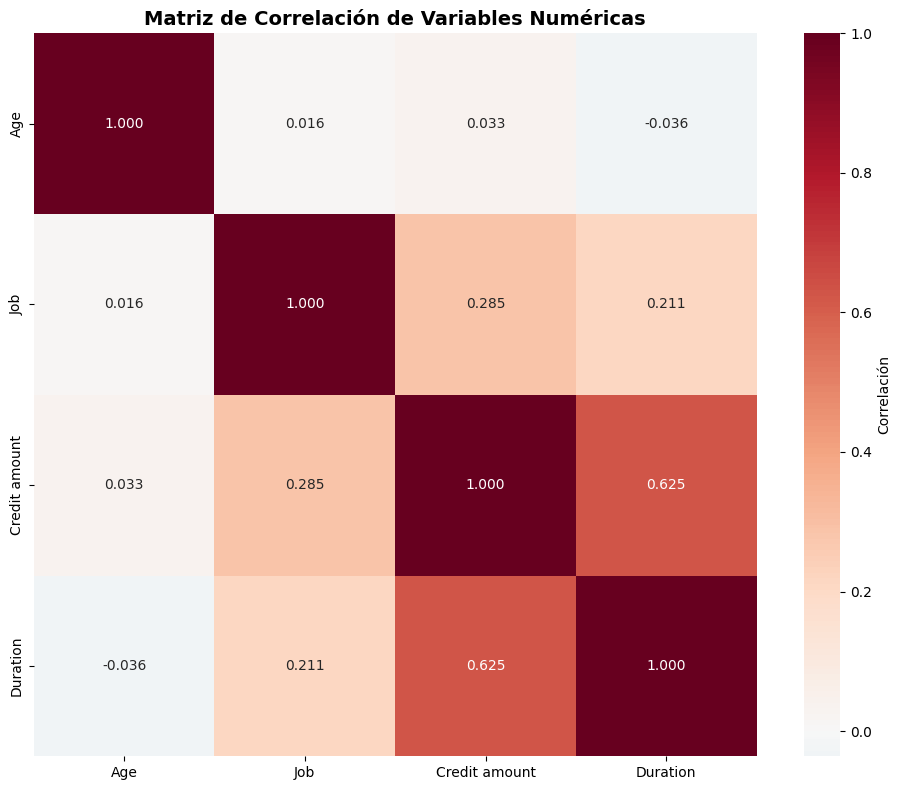

In [67]:
corr_data = df[['Age', 'Job', 'Credit amount', 'Duration']].copy()
correlation_matrix = corr_data.corr()
correlation_matrix.round(3)
        
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
                    annot=True, 
                    cmap='RdBu_r', 
                    center=0,
                    square=True,
                    fmt='.3f',
                    cbar_kws={'label': 'Correlación'})
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Para que se genere una descripción adecuada agregaremos una columna al data set que asocie los valores de la columna 'Job' con el significado

Job:
0: unskilled and non-resident

1: unskilled and resident

2: skilled

3: highly skilled



Dejaremos la exploración hasta este punto, en los boxplot observamos algunos puntos que pudieran ser 'outliers' sin embargo los valores no son disconformes con la realidad, confiando en la ingeniería de datos previa, se mantendrá los datos, y los valores faltantes se rellenará con 'unknown' ya que se tomará como otra categoría para el prompt y el posterior entrenamiento.

In [69]:
df = pd.read_csv('data/credit_data_with_descriptions.csv')

In [75]:
df['description'][0]

'"""\n\n        The customer is a 67-year-old male with a skilled occupation, who owns his residence. He has a limited current account balance, but no information is available regarding his savings account. He is requesting a €1,169 loan for a period of 6 months, with the purpose of purchasing a radio or TV.'

In [78]:
df = pd.read_csv('data/credit_data_with_targets.csv')

In [79]:
df.head()

,Age,Sex,Job,Housing,Savings account,Checking account,Credit amount,Duration,Purpose,description,target
0,67,male,2,own,unknown,little,1169,6,radio/TV,"""""""\n\n The customer is a 67-year-old m...",good risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,"""""""\n\n This 22-year-old female custome...",good risk
2,49,male,1,own,little,unknown,2096,12,education,"""""""\n\ncustomer_description = ""The customer is...",bad risk
3,45,male,2,free,little,little,7882,42,furniture/equipment,"""""""\n\n The 45-year-old male customer, ...",good risk
4,53,male,2,free,little,little,4870,24,car,"""""""\n\ncustomer_description = ""This 53-year-ol...",good risk


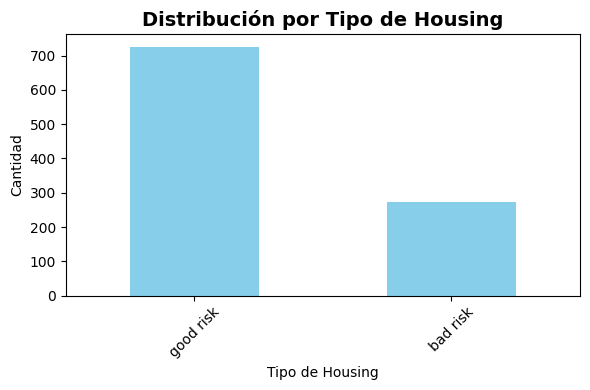

In [81]:
target = df['target'].value_counts()
fig, ax1 = plt.subplots(figsize=(6, 4))
target.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Distribución por Tipo de Housing', fontsize=14, fontweight='bold')
ax1.set_xlabel('Tipo de Housing')
ax1.set_ylabel('Cantidad')
ax1.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [84]:
df['target'].value_counts()

target
good risk    726
bad risk     274
Name: count, dtype: int64

In [83]:
df.head()

,Age,Sex,Job,Housing,Savings account,Checking account,Credit amount,Duration,Purpose,description,target
0,67,male,2,own,unknown,little,1169,6,radio/TV,"""""""\n\n The customer is a 67-year-old m...",good risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,"""""""\n\n This 22-year-old female custome...",good risk
2,49,male,1,own,little,unknown,2096,12,education,"""""""\n\ncustomer_description = ""The customer is...",bad risk
3,45,male,2,free,little,little,7882,42,furniture/equipment,"""""""\n\n The 45-year-old male customer, ...",good risk
4,53,male,2,free,little,little,4870,24,car,"""""""\n\ncustomer_description = ""This 53-year-ol...",good risk


In [1]:
import boto3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import sagemaker
from sagemaker.xgboost.estimator import XGBoost
from sagemaker.tuner import IntegerParameter, ContinuousParameter, HyperparameterTuner
from sagemaker.inputs import TrainingInput
import os
import time

sagemaker.config INFO - Not applying SDK defaults from location: C:\ProgramData\sagemaker\sagemaker\config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: C:\Users\Usuario\AppData\Local\sagemaker\sagemaker\config.yaml


In [2]:
df = pd.read_csv('data/credit_data_with_targets.csv')

In [3]:
feature_columns = ['Age', 'Sex', 'Job', 'Housing', 'Savings account', 
                          'Checking account', 'Credit amount', 'Duration', 'Purpose']
X = df[feature_columns].copy()
y = df['target'].copy()
#enconding
encoders = {}
categorical_columns = ['Sex','Housing','Savings account','Checking account', 'Purpose'] #Job ya está codificado
for col in categorical_columns:
    label_encoder = LabelEncoder()
    X[col] = label_encoder.fit_transform(X[col].astype(str))
    encoders[col] = label_encoder

target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)
encoders['target'] = target_encoder
#entrenamiento (stratify asegura que la proporción de clases se a mantenga en ambos conjuntos)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [4]:
train_data = pd.concat([pd.Series(y_train), X_train.reset_index(drop=True)], axis=1)
test_data = pd.concat([pd.Series(y_test), X_test.reset_index(drop=True)], axis=1)

In [ ]:
train_data.head()

,0,Age,Sex,Job,Housing,Savings account,Checking account,Credit amount,Duration,Purpose
0,0,27,0,2,2,4,1,1924,18,4
1,0,42,1,1,1,0,3,1455,4,1
2,1,28,0,2,2,0,0,1403,15,1
3,1,42,1,2,0,0,1,6288,60,3
4,1,28,1,2,1,0,3,776,12,5


In [6]:
test_data.head()

,0,Age,Sex,Job,Housing,Savings account,Checking account,Credit amount,Duration,Purpose
0,0,39,1,1,1,0,3,7228,11,1
1,1,37,1,2,0,4,3,2279,12,5
2,1,34,1,2,1,0,0,3965,42,5
3,1,29,1,2,1,0,3,2743,28,5
4,1,33,1,3,1,0,1,4439,18,0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   0                 800 non-null    int32
 1   Age               800 non-null    int64
 2   Sex               800 non-null    int32
 3   Job               800 non-null    int64
 4   Housing           800 non-null    int32
 5   Savings account   800 non-null    int32
 6   Checking account  800 non-null    int32
 7   Credit amount     800 non-null    int64
 8   Duration          800 non-null    int64
 9   Purpose           800 non-null    int32
dtypes: int32(6), int64(4)
memory usage: 43.9 KB


In [8]:
os.makedirs('data', exist_ok=True)
train_path = f"data/train_data.csv"
test_path = f"data/test_data.csv"

In [9]:
train_data.to_csv(train_path, header = False, index = False)
test_data.to_csv(test_path, header = False, index = False)

In [1]:
import joblib
encoders = joblib.load('train_info/ai-fraud-20250724-183602/encoders.pkl')
print(encoders.keys())  

dict_keys(['Sex', 'Housing', 'Savings account', 'Checking account', 'Purpose', 'target'])
